In [25]:
import qiskit as q
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
from qiskit_aer import Aer

#style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.
# to use dark mode:
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/bloch.py line 177 self.font_color = 'white'
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/counts_visualization.py line 206     ax.set_facecolor('#000000')
%matplotlib inline



def do_job(circuit,n_qubits):
    backend = Aer.get_backend("statevector_simulator")
    nc = transpile(circuit,backend)
    job = backend.run(nc)
    result = job.result()
    statevec = result.get_statevector()
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])

    backend = Aer.get_backend("qasm_simulator")
    nc = transpile(circuit,backend)
    job = backend.run(nc)
    result = job.result()
    counts = result.get_counts()
    
    return statevec, counts

In [26]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit,2)

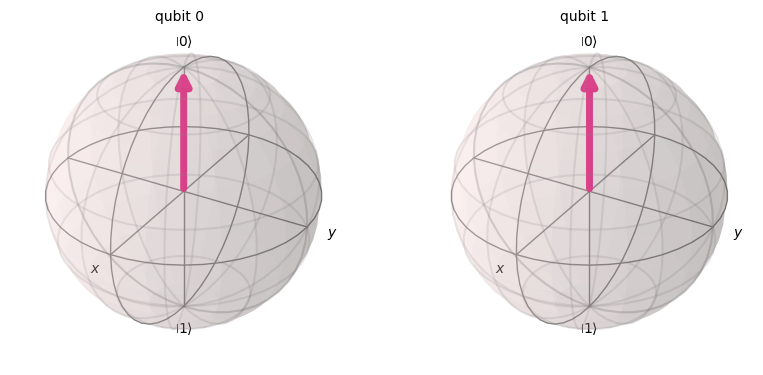

In [27]:
plot_bloch_multivector(statevec)


In [30]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits 
circuit.h(0)
circuit.h(1)
circuit.cx(0,2)
circuit.cx(1,2)
circuit.draw()

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘
c: 3/═══════════════

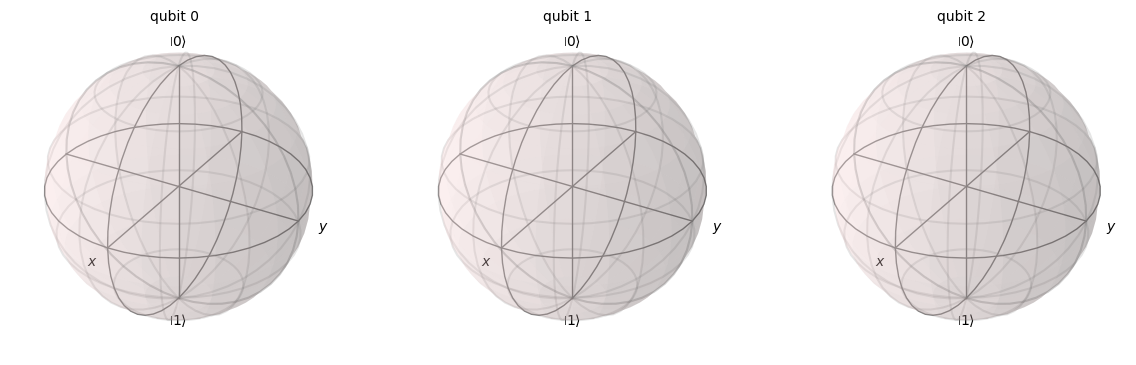

In [31]:
plot_bloch_multivector(statevec)


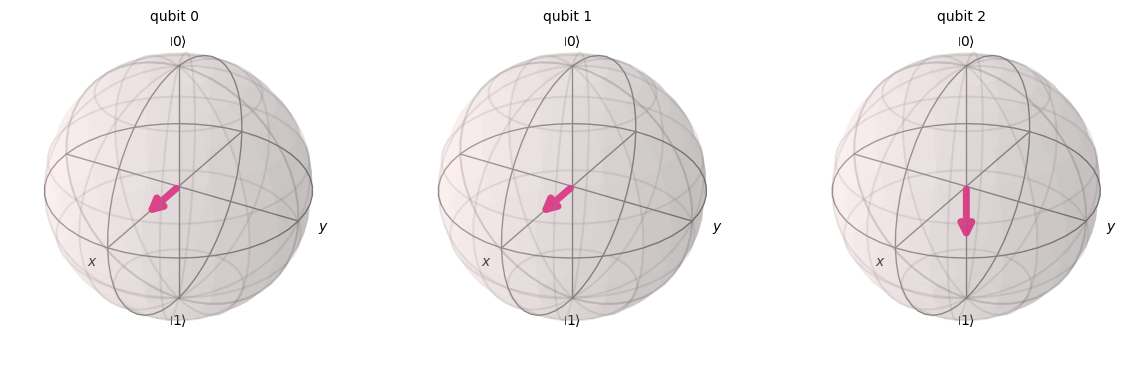

In [34]:
import math
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit,3)
plot_bloch_multivector(statevec)

In [39]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)
circuit.draw()

┌───┐                
q_0: ┤ H ├──■─────────────
     ├───┤  │             
q_1: ┤ H ├──■─────────────
     └───┘┌─┴─┐┌─────────┐
q_2: ─────┤ X ├┤ Rx(π/2) ├
          └───┘└─────────┘
c: 3/═════════════════════

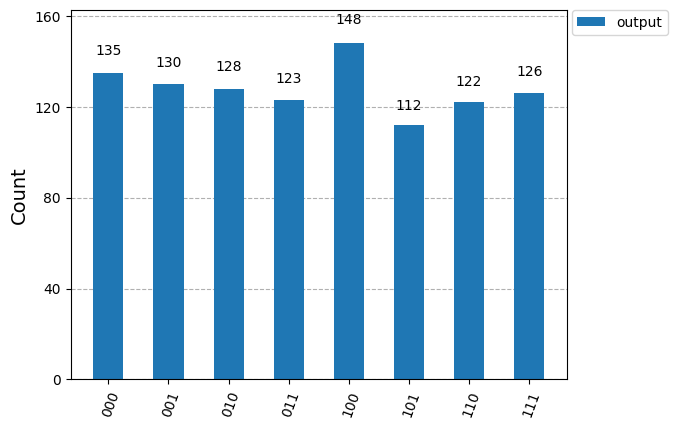

In [40]:

statevec, counts = do_job(circuit,3)

plot_histogram([counts], legend=['output'])


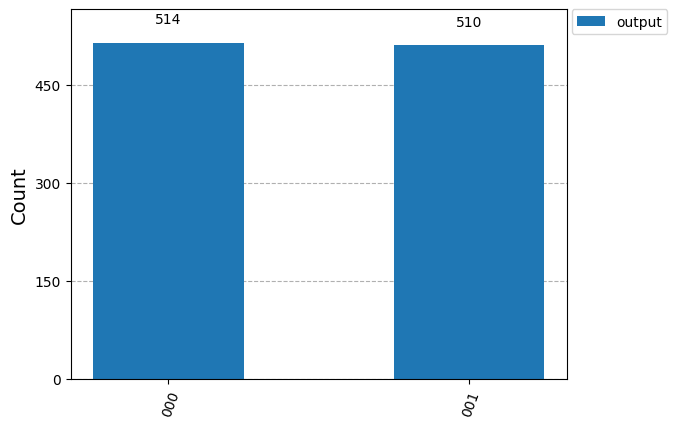

In [38]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
#result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
backend = Aer.get_backend("qasm_simulator")
nc = transpile(circuit,backend)
job = backend.run(nc)
result = job.result()

counts = result.get_counts()
plot_histogram([counts], legend=['output'])

In [41]:
circuit = q.QuantumCircuit(3,1)  # 3 qubits, only 1 classical bit
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 1/══════════

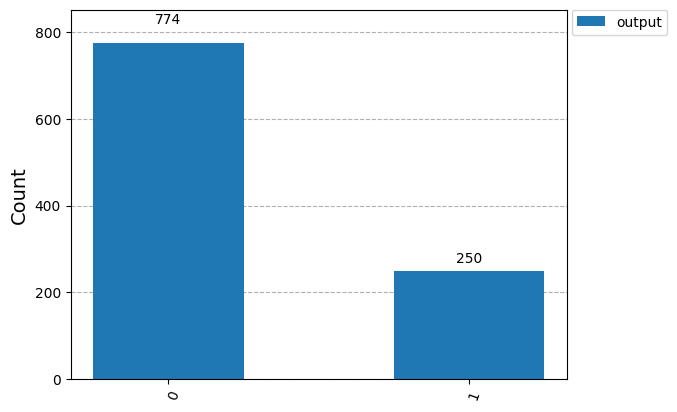

In [42]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
backend = Aer.get_backend("qasm_simulator")
nc = transpile(circuit,backend)
job = backend.run(nc)
result = job.result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])